## Getting to know the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tweet = pd.read_csv('data/train.csv')
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tweet.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
tweet.shape

(7613, 5)

In [18]:
tweet["location"].head(5)
tweet["keyword"].head(5)
tweet["text"].head(5)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

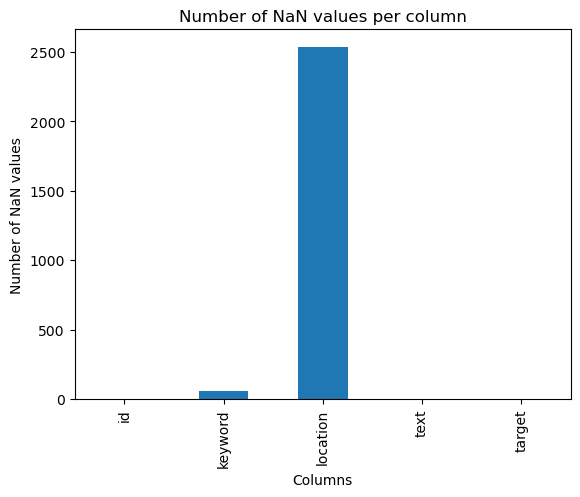

In [17]:
nan_counts = tweet.isna().sum()
plot = nan_counts.plot.bar(title='Number of NaN values per column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN values')
plt.show()

In [20]:
tweet["keyword"].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [ ]:
# text length
tweet['text_length'] = tweet['text'].apply(len)
tweet['text_length'].head()

0     69
1     38
2    133
3     65
4     88
Name: text_length, dtype: int64

In [ ]:
# correlaion between text length and target
correlation = tweet['text_length'].corr(tweet['target'])
print(f'Correlation between text length and target: {correlation}')
# No correlation found

Correlation between text length and target: 0.18181684254460753


In [ ]:
# check presence of keywords in text
tweet['keyword_in_text'] = tweet.apply(lambda row: row['keyword'] in row['text'] if pd.notna(row['keyword']) else 0, axis=1)
tweet[['keyword', 'text', 'keyword_in_text']].head(100)

,keyword,text,keyword_in_text
0,NaN,Our Deeds are the Reason of this #earthquake M...,False
1,NaN,Forest fire near La Ronge Sask. Canada,False
2,NaN,All residents asked to 'shelter in place' are ...,False
3,NaN,"13,000 people receive #wildfires evacuation or...",False
4,NaN,Just got sent this photo from Ruby #Alaska as ...,False
...,...,...,...
95,accident,9 Mile backup on I-77 South...accident blockin...,True
96,accident,Has an accident changed your life? We will hel...,True
97,accident,#BREAKING: there was a deadly motorcycle car a...,True
98,accident,@flowri were you marinading it or was it an ac...,True


In [29]:
# common disaster keywords in non-disaster tweets
non_disaster_tweets = tweet[tweet['target'] == 0]
common_keywords_non_disaster = non_disaster_tweets['keyword'].value_counts()
print("Common disaster keywords in non-disaster tweets:")
print(common_keywords_non_disaster)

Common disaster keywords in non-disaster tweets:
keyword
body%20bags          40
harm                 37
armageddon           37
wrecked              36
ruin                 36
                     ..
typhoon               1
suicide%20bombing     1
suicide%20bomber      1
outbreak              1
oil%20spill           1
Name: count, Length: 218, dtype: int64


In [30]:
# common disaster keywords in disaster tweets
disaster_tweets = tweet[tweet['target'] == 1]
common_keywords_disaster = disaster_tweets['keyword'].value_counts()
print("Common disaster keywords in disaster tweets:")
print(common_keywords_disaster)

Common disaster keywords in disaster tweets:
keyword
derailment     39
wreckage       39
outbreak       39
debris         37
oil%20spill    37
               ..
blazing         1
epicentre       1
body%20bag      1
electrocute     1
ruin            1
Name: count, Length: 220, dtype: int64
